In [3]:
import numpy as np
import pandas as pd

In [4]:
fe_boru=pd.read_csv('rlogfe.csv')

In [5]:
fe_boru.outcome.value_counts()

1    299
0     28
Name: outcome, dtype: int64

In [6]:
fe_boru.head()

,outcome,KRT80,SCGN,CDH3,CEMIP,BEST4,ESM1,GLP2R,OTOP2,SCARA5,...,SLC30A10,SLC25A23,TMEM100,TMEM253,GUCA2A,PLP1,SPIB,CADM3,PLPP1,KRT24
0,1,11.931829,3.059055,12.616037,12.599462,6.174449,7.169737,5.094664,3.059055,7.604472,...,4.420463,11.768730,1.265924,5.263310,7.507449,5.094664,3.677475,3.059055,9.569704,1.265924
1,1,10.204798,3.589669,11.413810,11.094808,4.833274,8.301505,5.164854,2.908608,6.515436,...,2.247362,10.884379,4.477869,4.199496,7.642718,4.259772,4.999964,4.833274,9.035718,1.265924
2,1,9.281589,5.049195,11.603694,12.061467,4.793745,6.954222,4.593755,3.916945,4.884082,...,2.471627,11.058882,4.227935,5.265790,9.506518,4.081150,6.681396,4.081150,9.719452,1.265924
3,1,8.796657,3.331911,10.615035,13.135689,6.201120,7.666343,4.975577,4.209370,7.442664,...,3.498091,10.392663,4.677310,6.005125,8.977852,3.498091,4.537911,2.915227,9.250811,1.265924
4,1,9.517437,1.892910,12.067773,12.129539,6.261376,5.840656,3.864255,1.265924,3.211085,...,3.910455,11.095175,2.955137,5.680822,5.530132,2.145905,2.955137,1.892910,8.764261,1.265924


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
import smote


## PCA

In [6]:
#pca
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=fe_boru.drop('outcome', axis=1)
scaler.fit(df)
scaled_data=scaler.transform(df)

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca=PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [8]:
t=np.asarray(fe_boru.outcome)
t=t.astype(object)

In [9]:
for i in range(len(t)):
    if t[i]==1:
        t[i]='cancer'
    else:
        t[i]='non-cancer'
    

In [10]:
pc_df=pd.DataFrame(data=x_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
pc_df['cluster']=t


In [11]:
scaled_data.shape

(327, 61)

In [12]:
x_pca.shape

(327, 5)

In [13]:
var= pca.explained_variance_ratio_

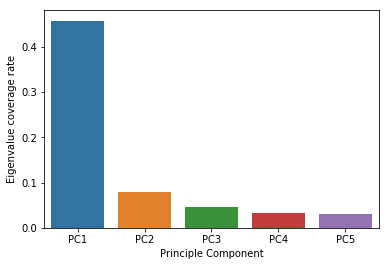

In [14]:
ex =pd.DataFrame({'Eigenvalue coverage rate':var,'Principle Component':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='Principle Component',y='Eigenvalue coverage rate',data=ex)

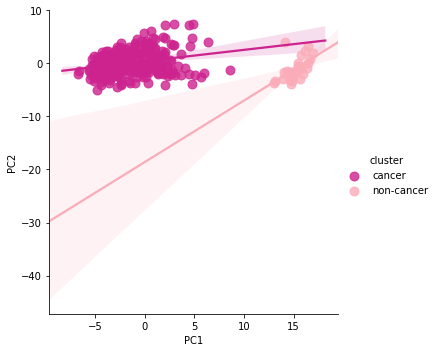

In [16]:
sns.lmplot(x='PC1',y='PC2', data=pc_df,hue='cluster',legend=True, palette='RdPu_r',
scatter_kws={"s": 80})

In [17]:
df_com = pd.DataFrame(pca.components_[0:2,:], columns=df.columns)

In [19]:
pd.set_option("display.max_rows", 109)
df_com.T

,0,1
KRT80,-0.152605,0.087057
SCGN,0.142855,0.065298
CDH3,-0.160822,0.024945
CEMIP,-0.148371,0.079199
BEST4,0.139360,-0.119286
ESM1,-0.151991,0.106761
GLP2R,0.127372,0.143236
OTOP2,0.165206,-0.126459
SCARA5,0.139345,0.081040
ETV4,-0.157074,0.030774


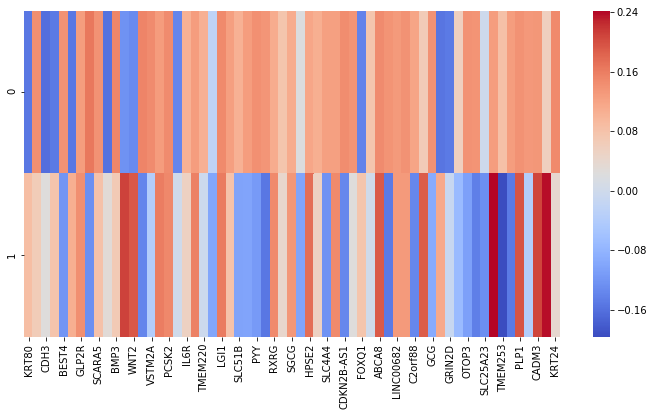

In [20]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df_com,cmap="coolwarm")

## the ML methods part

In [8]:
X0=fe_boru[fe_boru['outcome']==0]
#X0=X0.reindex(np.random.permutation(X0.index))

In [9]:
X1=fe_boru[fe_boru['outcome']==1]
#X1=X1.reindex(np.random.permutation(X1.index))

In [10]:
X00=X0.drop('outcome',axis=1)
y00=X0['outcome']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X00, y00, 
                                                    test_size=0.33, 
                                                    random_state=101)

In [11]:
X11=X1.drop('outcome',axis=1)
y11=X1['outcome']
X_train0, X_test0, y_train0, y_test0 = train_test_split(X11, y11, 
                                                    test_size=0.33, 
                                                    random_state=101)

In [12]:
X_train=X_train1.append(pd.DataFrame(data=X_train0))
X_test=X_test1.append(pd.DataFrame(data=X_test0))
y_train=np.concatenate([y_train1,y_train0])
y_test=np.concatenate([y_test1,y_test0])

# testing with the imbalanced dataset

In [11]:
fe_boru=fe_boru.reindex(np.random.permutation(fe_boru.index))
X = fe_boru.drop('outcome', axis=1)
y=fe_boru['outcome']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [28]:
from collections import Counter
print(sorted(Counter(y_test).items()))


[(0, 9), (1, 99)]


In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [30]:
pred_test=rf.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test,pred_test))
print('\n')
print(confusion_matrix(y_test,pred_test))

             precision    recall  f1-score   support

          0       0.90      1.00      0.95         9
          1       1.00      0.99      0.99        99

avg / total       0.99      0.99      0.99       108



[[ 9  0]
 [ 1 98]]


In [33]:
print(rf.feature_importances_)
feature_imp = pd.Series(rf.feature_importances_,index=list(fe_boru.drop('outcome',axis=1).columns.values)).sort_values(ascending=False)

[0.1        0.         0.         0.         0.01403306 0.2
 0.         0.         0.         0.05       0.04059278 0.15251338
 0.1        0.0021709  0.03569613 0.         0.         0.05
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00232781 0.         0.         0.
 0.         0.         0.05723632 0.         0.         0.0254702
 0.01049673 0.         0.         0.00451456 0.         0.01465774
 0.09480495 0.         0.         0.04013445 0.         0.
 0.         0.         0.00261369 0.         0.00273729 0.
 0.        ]


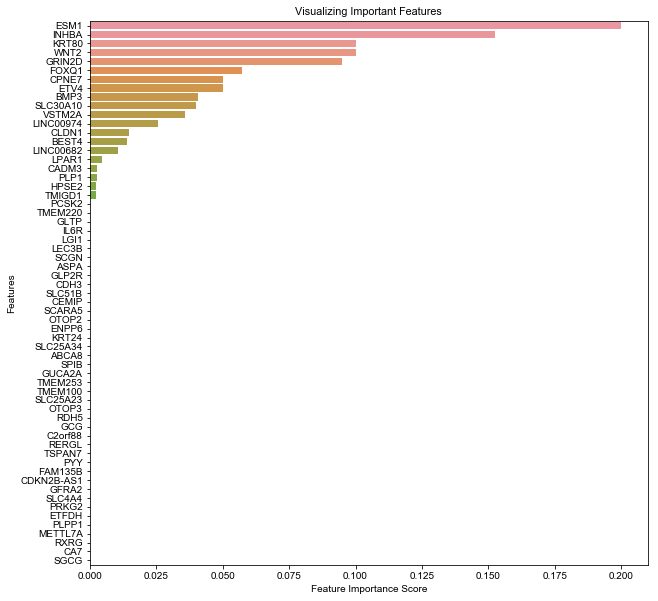

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(font_scale=0.9)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
plt.savefig('importance ranking for female')
plt.close()


## adaboost with randomly over sampling

In [13]:
#regular over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=101)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))


[(0, 200), (1, 200)]


In [14]:
model = AdaBoostClassifier(n_estimators=100, random_state=101)
model.fit(X_resampled, y_resampled)
y_over = model.predict(X_test)


In [15]:
print(classification_report(y_test, y_over))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90        10
          1       0.99      0.99      0.99        99

avg / total       0.98      0.98      0.98       109



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_over)

array([[ 9,  1],
       [ 1, 98]], dtype=int64)

0.944949494949495


Text(0.5, 0, 'False Positive Rate')

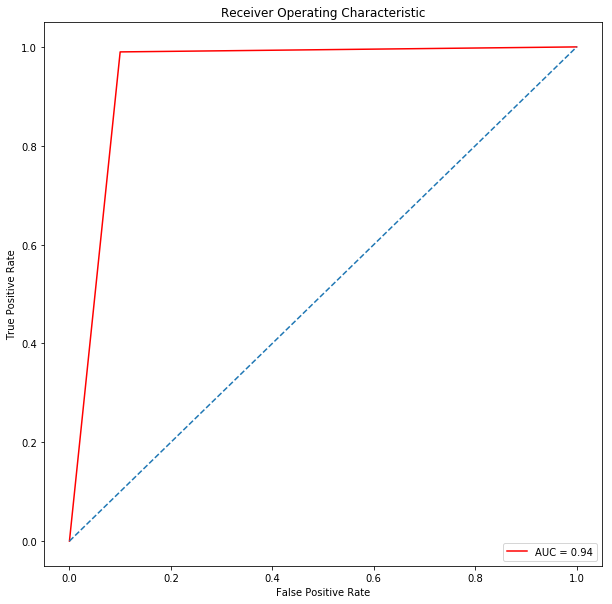

In [17]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_over)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## randomly over sampling with random forests


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                               random_state=101)


In [19]:
m2=clf.fit(X_resampled, y_resampled)

In [20]:
y_pred=clf.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        99

avg / total       1.00      1.00      1.00       109



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 0, 99]], dtype=int64)

In [23]:
print(clf.feature_importances_)
feature_imp = pd.Series(clf.feature_importances_,index=list(fe_boru.drop('outcome',axis=1).columns.values)).sort_values(ascending=False)

[8.05914046e-02 1.95210910e-02 6.03964710e-02 4.12317565e-02
 1.94090671e-02 1.09405827e-01 6.76165177e-04 9.99957718e-03
 8.86792453e-03 4.02000373e-02 2.02847932e-02 3.97003859e-02
 7.16298836e-02 7.06078302e-02 8.75333094e-03 0.00000000e+00
 0.00000000e+00 8.97012357e-02 8.60055045e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.95595625e-04 9.95074382e-05
 7.86483644e-04 9.98302885e-05 9.95520159e-05 3.93094079e-02
 8.82246184e-04 0.00000000e+00 2.96354836e-04 0.00000000e+00
 0.00000000e+00 2.95474645e-04 0.00000000e+00 0.00000000e+00
 9.51972354e-03 9.95767986e-05 5.97019707e-02 0.00000000e+00
 1.99277619e-04 0.00000000e+00 4.92780762e-04 9.95520159e-05
 2.96691885e-04 0.00000000e+00 2.96208531e-04 3.91112286e-02
 8.00000000e-02 9.99550202e-05 2.93220508e-02 2.90196230e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.90004498e-03
 0.00000000e+00 0.00000000e+00 9.95321987e-05 0.00000000e+00
 0.00000000e+00]


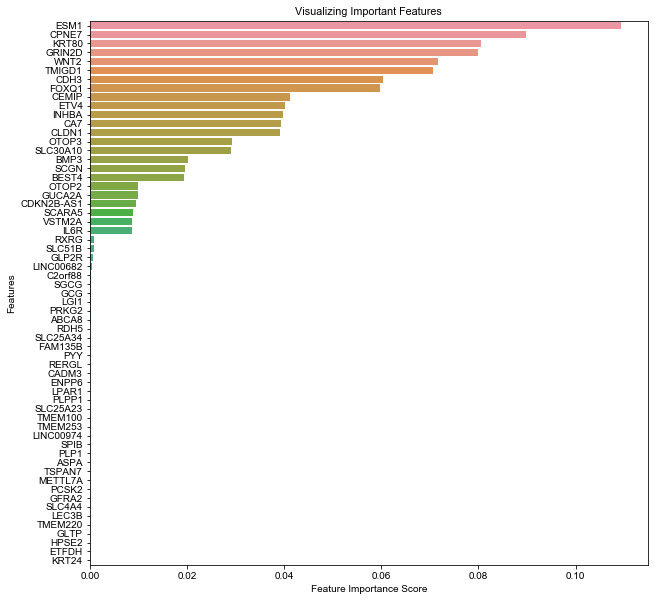

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
# Creating a bar plot

sns_plot=sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(font_scale=0.9)
fig=sns_plot.get_figure()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
fig.savefig('importance ranking for male')


## adaboost with SMOTE

In [25]:
# SMOTE
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=101)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))


Original dataset shape Counter({1: 200, 0: 18})
Resampled dataset shape Counter({0: 200, 1: 200})


In [26]:
model = AdaBoostClassifier(n_estimators=100, random_state=101)
m1=model.fit(X_train_sm, y_train_sm)
y_smote = model.predict(X_test)


In [27]:
print(classification_report(y_test, y_smote))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90        10
          1       0.99      0.99      0.99        99

avg / total       0.98      0.98      0.98       109



In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_smote)

array([[ 9,  1],
       [ 1, 98]], dtype=int64)

0.944949494949495


Text(0.5, 0, 'False Positive Rate')

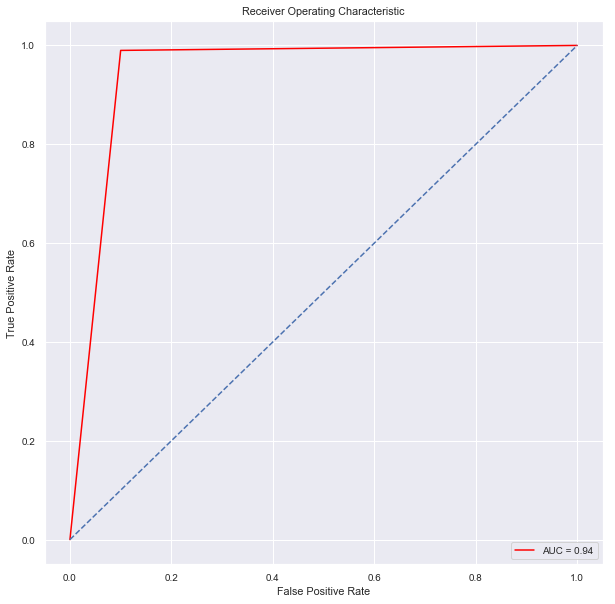

In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_smote)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## RF with SMOTE

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                               random_state=101)
m2=clf.fit(X_train_sm, y_train_sm)

In [32]:
y_pred=clf.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        99

avg / total       1.00      1.00      1.00       109



In [34]:
print(clf.feature_importances_)
feature_imp = pd.Series(clf.feature_importances_,index=list(fe_boru.drop('outcome',axis=1).columns.values)).sort_values(ascending=False)

[8.03974340e-02 1.95210517e-02 6.01994046e-02 4.07692308e-02
 9.70218247e-03 1.09405827e-01 6.76165177e-04 2.00000000e-02
 9.23076923e-03 4.02999901e-02 2.02847932e-02 3.97003859e-02
 7.09741871e-02 6.94065028e-02 1.91112140e-02 0.00000000e+00
 0.00000000e+00 7.99993443e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.95595625e-04 9.95074382e-05
 6.90279665e-04 9.98302885e-05 9.95520159e-05 3.93094079e-02
 8.82246184e-04 0.00000000e+00 2.96354836e-04 0.00000000e+00
 0.00000000e+00 2.95633020e-04 0.00000000e+00 0.00000000e+00
 9.51972354e-03 9.95767986e-05 5.95039362e-02 9.96366180e-05
 1.99277619e-04 0.00000000e+00 4.92780762e-04 9.95520159e-05
 2.96691885e-04 0.00000000e+00 2.96208531e-04 4.94029336e-02
 8.00000000e-02 9.99550202e-05 2.91236381e-02 2.90196230e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.90004498e-03
 0.00000000e+00 0.00000000e+00 9.95321987e-05 0.00000000e+00
 0.00000000e+00]


In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 0, 99]], dtype=int64)

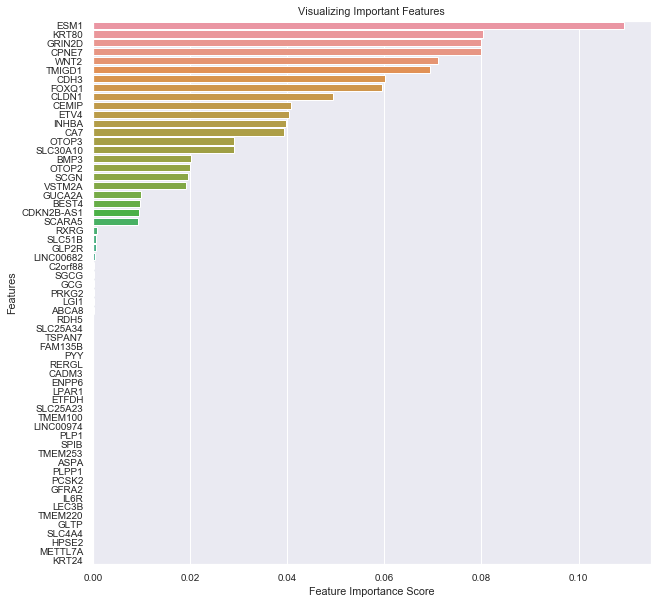

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
# Creating a bar plot

sns_plot=sns.barplot(x=feature_imp, y=feature_imp.index)
sns.set(font_scale=0.9)
fig=sns_plot.get_figure()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
fig.savefig('importance ranking for male')


1.0


Text(0.5, 0, 'False Positive Rate')

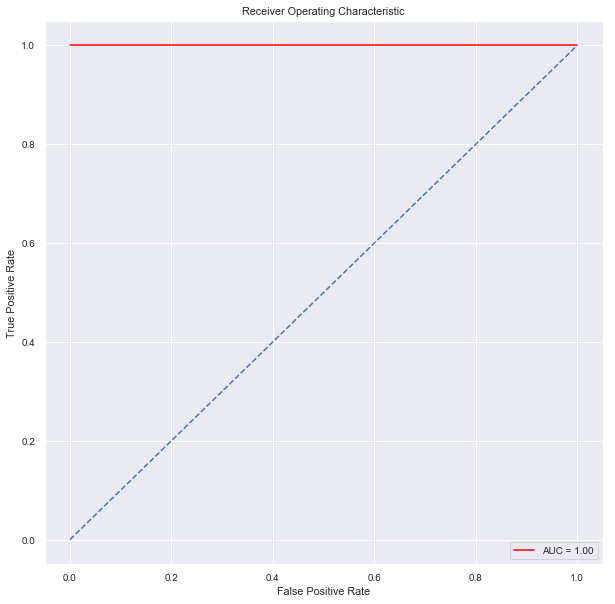

In [37]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')